In [1]:
%pylab inline
from core import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
b1 = np.load(join(reddir,'bias_y.npz'))['ccd1_raw']
b2 = np.load(join(reddir,'bias_y.npz'))['ccd2_raw']

In [3]:
d1 = pf.getdata(l_obj[-1], ext=1) - b1[:,newaxis]
d2 = pf.getdata(l_obj[-1], ext=2) - b2[:,newaxis]

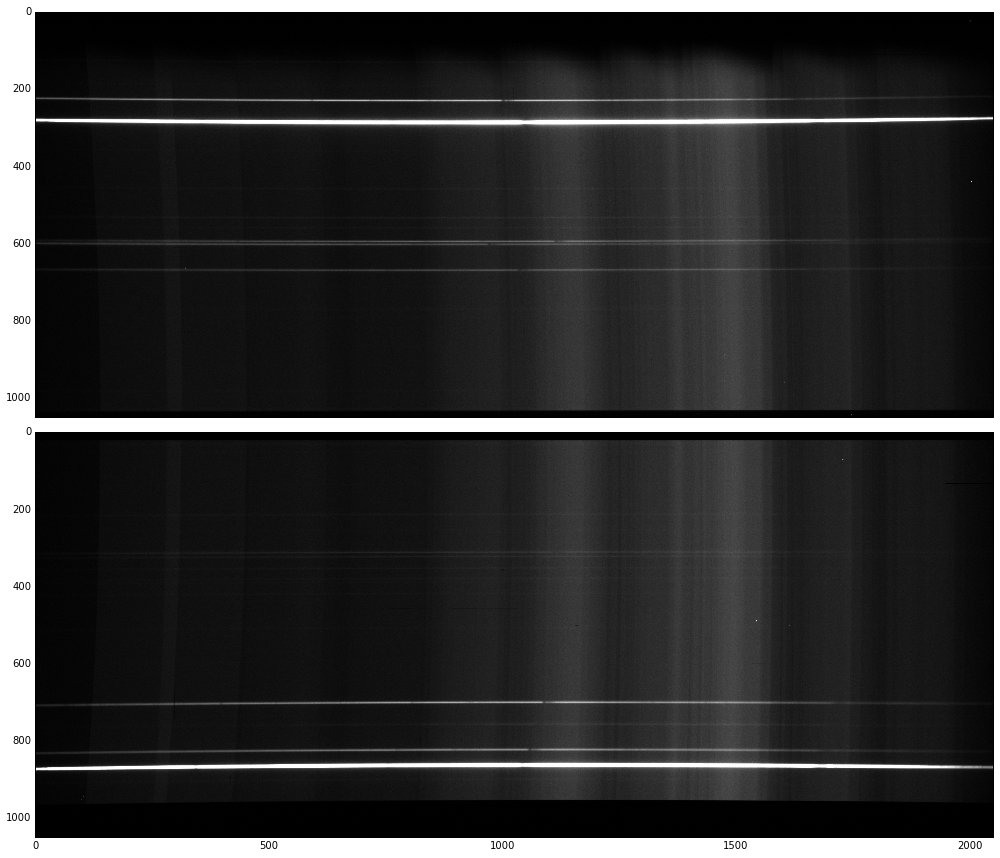

In [4]:
fig,ax = subplots(2,1,figsize=(14,12), sharex=True)
ax[0].imshow(d1.T, cmap=cm.gray, aspect='auto', vmin=0, vmax=1300)
ax[1].imshow(d2.T, cmap=cm.gray, aspect='auto', vmin=0, vmax=1300)
fig.tight_layout()

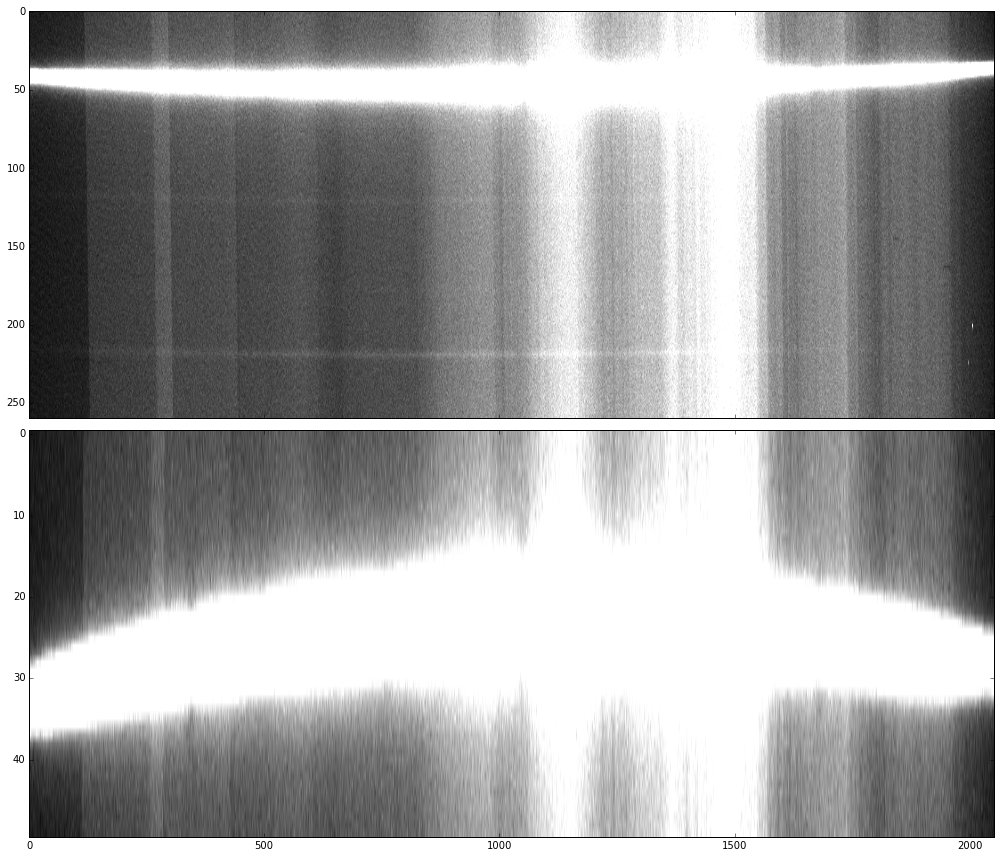

In [5]:
fig,ax = subplots(2,1,figsize=(14,12), sharex=True)
ax[0].imshow(d1[:,240:500].T, cmap=cm.gray, aspect='auto', vmin=0, vmax=300)
ax[1].imshow(d2[:,840:890].T, cmap=cm.gray, aspect='auto', vmin=0, vmax=300)
fig.tight_layout()

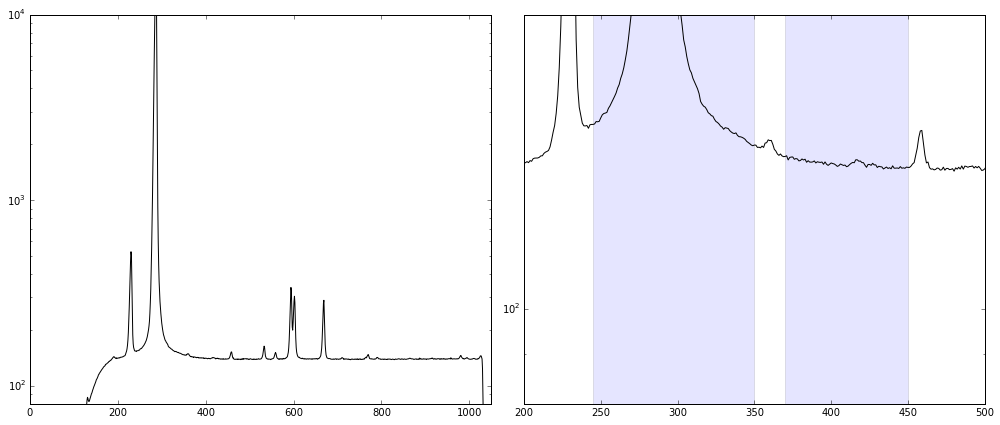

In [6]:
fig,ax = subplots(1,2,figsize=(14,6))
ax[0].semilogy(d1.mean(0), 'k')
ax[1].axvspan(245,350, alpha=0.1)
ax[1].axvspan(370,450, alpha=0.1)
ax[1].semilogy(d1.mean(0), 'k')
setp(ax[0], ylim=(80,1e4), xlim=(0,d1.shape[1]))
setp(ax[1], ylim=(80,2e2), xlim=(200,500))
fig.tight_layout()

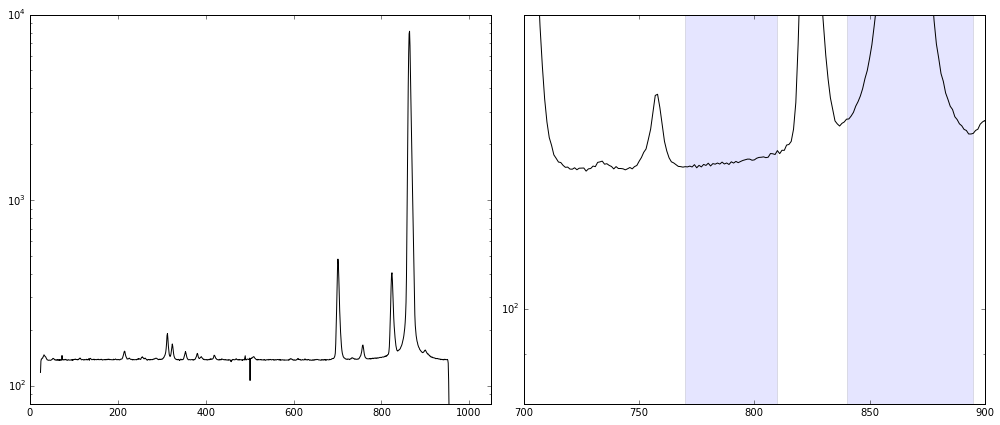

In [7]:
fig,ax = subplots(1,2,figsize=(14,6))
ax[0].semilogy(d2.mean(0), 'k')
ax[1].axvspan(840,895, alpha=0.1)
ax[1].axvspan(770,810, alpha=0.1)
ax[1].semilogy(d2.mean(0), 'k')
setp(ax[0], ylim=(80,1e4), xlim=(0,d2.shape[1]))
setp(ax[1], ylim=(80,2e2), xlim=(700,900))
fig.tight_layout()

## Create datacubes

The light curve creation etc. will be much nicer with datacubes, so let's create ones for our objects and skys.

In [17]:
def create_datacube(ext, window, ctype, filename):
    cube = array([pf.getdata(obj, ext=ext)[:,window] for obj in l_obj])
    hdr  = pf.getheader(l_obj[0])
    hdu  = pf.PrimaryHDU(data=cube)
    hdu.header.update('window','{}:{}'.format(window.start,window.stop))
    hdu.header.update('type','object')
    hdu.header.update('ccd',1,'CCD id')
    hdu.header.append('rspeed')
    hdu.header.append('gain')
    hdu.header.append('instrume')
    hdu.header.append('detector')
    hdu.writeto(join(reddir,filename), clobber=True)

In [15]:
create_datacube(1, s_[245:350], 'object', 'cube_o1.fits')
create_datacube(1, s_[370:450], 'sky',    'cube_s1.fits')

In [16]:
create_datacube(2, s_[840:895], 'object', 'cube_o2.fits')
create_datacube(2, s_[770:810], 'sky',    'cube_s2.fits')